# Basic Info
We want to create an LDA model for the Opioid Tweets.
The primary resource upon creating this notebook is [the following page](https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html). Most the meat is from that site but there's plenty of things that are tweaked to better suit our needs. 
The visualization portion was created with the help of an [example notebook by pyLDAvis](https://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb#topic=0&lambda=1&term=) and [this site](https://shichaoji.com/tag/topic-modeling-python-lda-visualization-gensim-pyldavis-nltk/) .

The current skeleton for what needs to be done, along with associated questions:
* First, we need to establish some basic ideas for the tweets we will be analyzing:
    * We need to make sure that the only part of the data we are using is the actual text of the tweet. 
    * Our tokenization should be wary of contractions; i.e. we remove one letter tokens. 
    * We cut off the end of the tweet if a "http" occurs so that we don't get irrelevant tokens.
    * A similar question arises with regard to hashtags.
* Next, we create the model. 
    * Should we consider trying/comparing different token/stop-words/stem packages?
    * How many iterations? topics? 
        * This will need trial and error to become certain of. 
* And finally evaluate, improve, and compare to the other model types. 
    * What areas can be improved and how? (hyperparameters)
    * How do we evaluate the success of the model?

# The Model
We import the necessary libraries and methods, including those of the Twitter data. 

In [1]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
import gensim
from gensim import corpora, models

import pandas as pd

Here, we define `how_many_topics`, which will cause the LDA model to sort the data into `how_many_topics` topics. 

The `for` loop below is to create the list `tweets` and remove the parts in the tweets that have the links at the end. 

In [2]:
how_many_topics = 20
tweets = []
df = pd.read_csv("../Cleaning/opioid_tweets_clean.csv")

for i in df['content']:
    i = i.split('http')[0]
    tweets.append(i)

Below is the tokenizing, establishing of stop-words, and stemming needed for the model; this includes removing one-letter 'words' from being in the `dictionary`

In [3]:
tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()

In [4]:
texts = []
for i in tweets:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    texts.append(stemmed_tokens)
    
dictionary = corpora.Dictionary(texts)

del_ids = [k for k,v in dictionary.items() if len(v)==1]
dictionary.filter_tokens(bad_ids=del_ids)

corpus = [dictionary.doc2bow(text) for text in texts]

Here we run the model where if `how_many_topics` = 5, then we are looking for 5 general topics to interpret. 

In [5]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=how_many_topics, id2word = dictionary, passes=20)

In [6]:
print(ldamodel.print_topics(num_topics=5, num_words=5))

[(18, '0.069*"now" + 0.062*"go" + 0.048*"fuck" + 0.035*"can" + 0.032*"codein"'), (11, '0.327*"codein" + 0.138*"crazi" + 0.033*"futur" + 0.025*"ring" + 0.024*"listen"'), (2, '0.210*"morphin" + 0.039*"re" + 0.031*"give" + 0.030*"buy" + 0.024*"pain"'), (12, '0.068*"time" + 0.049*"ve" + 0.035*"thing" + 0.026*"year" + 0.025*"today"'), (8, '0.039*"pain" + 0.036*"percocet" + 0.034*"want" + 0.031*"don" + 0.030*"just"')]


# Visualization

Now we try some visualization. 

Below is the initial attempt at visualization of the topics using the `pyLDAvis` package for our LDA model:

In [7]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

C:\Users\E7480\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8     -0.132332  0.241989       1        1  8.427703
13     0.342461  0.056924       2        1  7.954885
17     0.293498  0.087361       3        1  6.826456
2     -0.102670  0.183578       4        1  6.815748
5      0.249134  0.052779       5        1  5.770470
11    -0.084648 -0.048560       6        1  5.638409
18    -0.122237  0.100205       7        1  5.616660
12    -0.009153  0.064240       8        1  5.422545
7     -0.104432  0.097334       9        1  4.762527
14    -0.022118  0.084741      10        1  4.624095
1     -0.056040  0.026324      11        1  4.586355
16    -0.063382 -0.085391      12        1  4.139993
6      0.037563 -0.166656      13        1  4.056595
15    -0.088920 -0.041663      14        1  3.919078
19    -0.030351 -0.113284      15        1  3.682600
4     -0.049497 -0.050140      16        1  3.656605
9      0.018886 -0.132153      17        1  3.642039
0      0.015019 -0.124634      18        1  3.575751
3     -0.042529 -0.143877      19        1  3.528991
10    -0.048250 -0.089117      20        1  3.352496, topic_info=     Category          Freq       Term         Total  loglift  logprob
term                                                                  
91    Default   7553.000000     codein   7553.000000  30.0000  30.0000
2     Default  10532.000000   fentanyl  10532.000000  29.0000  29.0000
1629  Default   5346.000000    morphin   5346.000000  28.0000  28.0000
1534  Default   3828.000000  oxycontin   3828.000000  27.0000  27.0000
1199  Default   4179.000000   percocet   4179.000000  26.0000  26.0000
171   Default   2894.000000      crazi   2894.000000  25.0000  25.0000
1501  Default   2422.000000    vicodin   2422.000000  24.0000  24.0000
193   Default   2089.000000        amp   2089.000000  23.0000  23.0000
129   Default   3113.000000       like   3113.000000  22.0000  22.0000
20    Default   2899.000000       drug   2899.000000  21.0000  21.0000
148   Default   2109.000000     heroin   2109.000000  20.0000  20.0000
445   Default   1450.000000        now   1450.000000  19.0000  19.0000
217   Default   1465.000000       need   1465.000000  18.0000  18.0000
177   Default   1380.000000       time   1380.000000  17.0000  17.0000
399   Default   1303.000000         go   1303.000000  16.0000  16.0000
49    Default   1291.000000      china   1291.000000  15.0000  15.0000
87    Default   2288.000000       pain   2288.000000  14.0000  14.0000
1533  Default    983.000000      maker    983.000000  13.0000  13.0000
346   Default   1802.000000        one   1802.000000  12.0000  12.0000
213   Default   1630.000000    overdos   1630.000000  11.0000  11.0000
86    Default   1991.000000     opioid   1991.000000  10.0000  10.0000
372   Default   1375.000000      peopl   1375.000000   9.0000   9.0000
274   Default   1135.000000        day   1135.000000   8.0000   8.0000
379   Default    980.000000      think    980.000000   7.0000   7.0000
370   Default    997.000000       fuck    997.000000   6.0000   6.0000
1034  Default    984.000000         ve    984.000000   5.0000   5.0000
353   Default    854.000000        new    854.000000   4.0000   4.0000
3326  Default    865.000000    sackler    865.000000   3.0000   3.0000
549   Default   1095.000000         us   1095.000000   2.0000   2.0000
560   Default   1080.000000       want   1080.000000   1.0000   1.0000
...       ...           ...        ...           ...      ...      ...
2530  Topic20    311.297852       west    312.391022   3.3920  -3.6925
299   Topic20    293.409912      court    294.503082   3.3917  -3.7517
2426  Topic20    264.037750      littl    265.130920   3.3913  -3.8572
1147  Topic20    245.613449       head    246.706619   3.3910  -3.9295
135   Topic20    241.417511    without    242.510681   3.3909  -3.9467
255   Topic20    209.728760       data    210.821930   3.3903  -4.0875
1040  Topic20    199.9

In [8]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

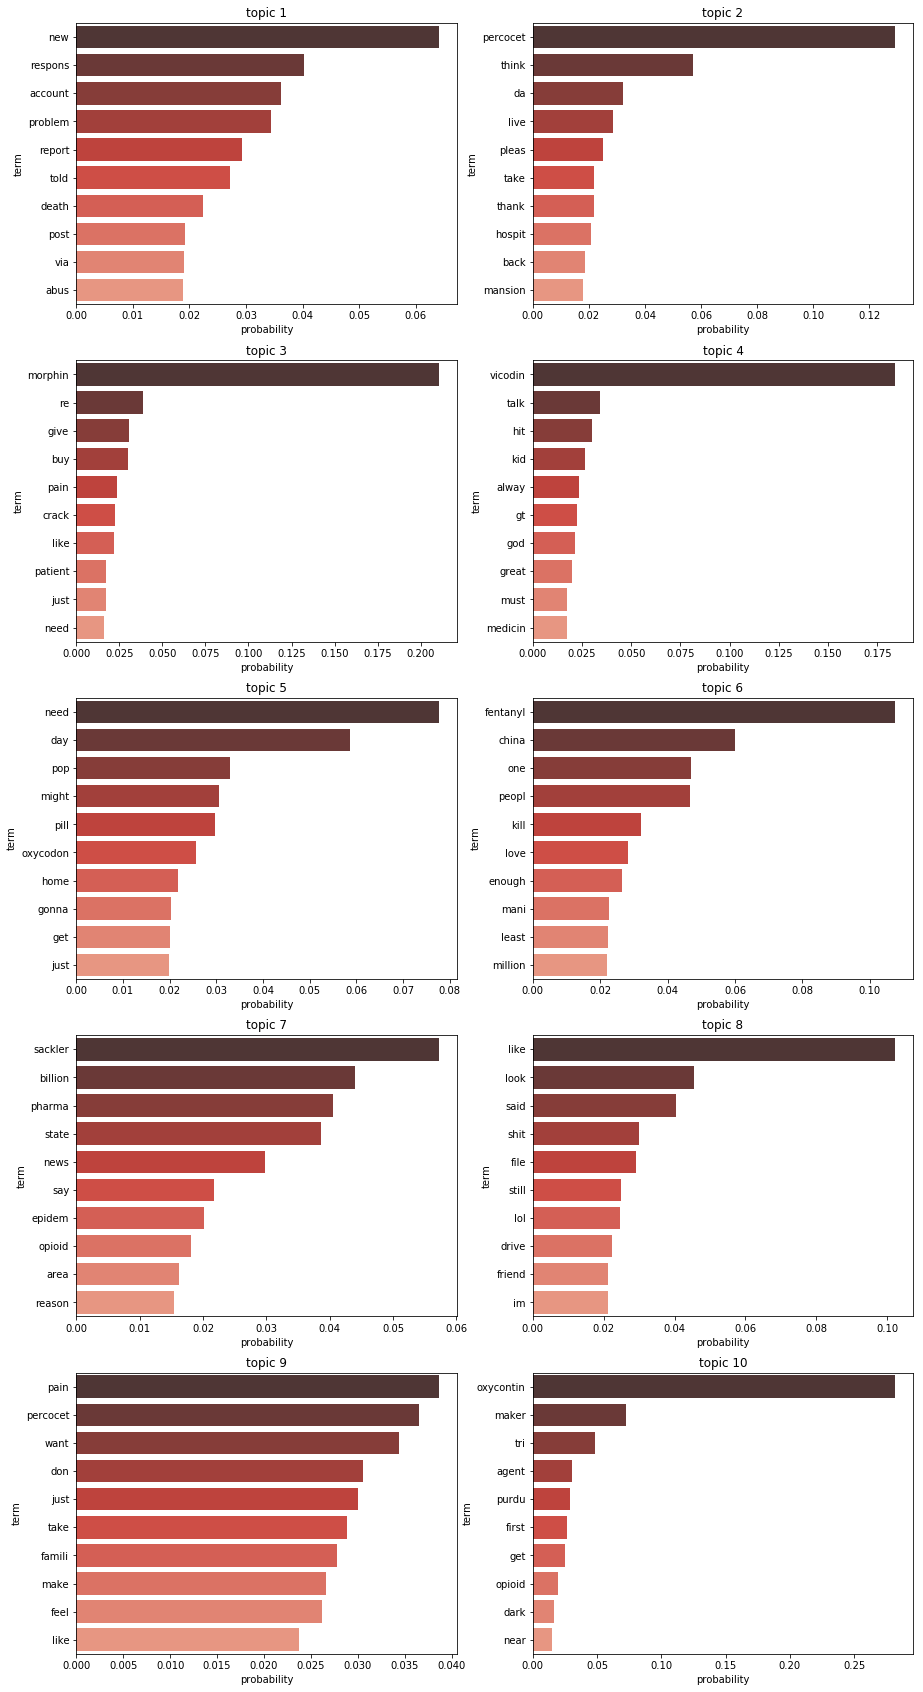

In [9]:
fiz=plt.figure(figsize=(15,30))
for i in range(10):
    df2=pd.DataFrame(ldamodel.show_topic(i), columns=['term','prob']).set_index('term')
#     df=df.sort_values('prob')
    
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df2.index, data=df2, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()